In [21]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# FOR KNN AND OTHER MODELS
# from scipy.optimize import curve_fit
# # from splinter import Browser
# # from bs4 import BeautifulSoup as BS
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.datasets import make_classification

# FOR TF MODELS
import keras.models
import keras.layers
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
### LIST OF IDAHO COUNTIES AND NOT IDAHO COUNTIES
idahoCounties = ['Ada', 'Adams', 'Bannock', 'Bear Lake', 'Benewah', 'Bingham', 'Blaine', 'Boise', 'Bonner', 'Bonneville', 'Boundary','Butte', 
 'Camas', 'Canyon', 'Caribou', 'Cassia', 'Clark', 'Clearwater', 'Custer', 'Elmore', 'Franklin', 'Fremont', 'Gem', 'Gooding', 
 'Idaho', 'Jefferson', 'Jerome' 'Kootenai', 'Latah', 'Lemhi', 'Lewis', 'Lincoln', 'Madison', 'Minidoka','Nez Perce', 
 'Oneida', 'Owyhee', 'Payette', 'Power', 'Shoshone', 'Teton', 'Twin Falls', 'Valley', 'Washington']
        

notIdahoCounties = ['Baker', 'Beaverhead', 'Box Elder', 'Elko', 'Gallatin', 'Malheur', 'Mineral', 'Missoula', 'Ravalli', 'Sanders']

# IMPORT DATA

In [23]:
### IMPORT DATA
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [24]:
### CONVERT DATE TO DATETIME FORMAT
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

# CREATE COLUMNS WE NEED
idaho_Fire_Weather_Drought_df['FIRE_DAYS'] = (((idaho_Fire_Weather_Drought_df['CONT_DOY']) + 1) - idaho_Fire_Weather_Drought_df['DISCOVERY_DOY'])
idaho_Fire_Weather_Drought_df['COUNTY_NAME'] = (idaho_Fire_Weather_Drought_df['FIPS_NAME'])
# Create month column
idaho_Fire_Weather_Drought_df['DISCOVERY_MONTH_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))

# FILTER ROWS FOR FIRES IN COUNTIES OUTSIDE IDAHO
idaho_Fire_Weather_Drought_df = idaho_Fire_Weather_Drought_df[idaho_Fire_Weather_Drought_df['NAME'].isin(idahoCounties)]

# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


In [25]:
### OUTPUT THE AND UPDATED CSV FILE

# output_path = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather_Plus.csv")
# with open(output_path, 'w') as csvfile:
#         idaho_Fire_Weather_Drought_df.to_csv(output_path, index=False)

## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [26]:
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4,FIRE_DAYS,COUNTY_NAME,DISCOVERY_MONTH_CONVERTED
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,77.00,69.08,69.98,71.06,1,Fremont,7
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,64.04,62.06,69.08,66.92,1,Bannock,7
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.0,69.08,66.92,64.04,64.94,1,Bannock,7
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,0.0,0.0,0.8,64.94,68.00,71.96,71.96,1,Bannock,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,15481,1847545,Point,1,1847545,300274025,SFO-2015IDIDL6102015028,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,64.58,60.80,59.90,60.62,2,Boise,10
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,0.0,0.9,0.0,58.28,60.08,66.74,59.36,2,Boundary,10
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,0.9,0.0,0.0,60.08,66.74,59.36,50.00,1,Boundary,10
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,0.0,0.0,0.0,67.28,58.46,61.52,63.68,1,Valley,10


In [27]:
### DEALING WITH NULL VALUES
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

## CREATING INPUTS FOR NEURAL NETWORK MODELING

In [28]:
### CORRELATION TESTS
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 
                                         'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 
                                         'DAY_AVG_TEMP_4']]

# Corr_df = idaho_Fire_Weather_Drought_df[['NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# CATEGORIZE COL 'FIRE_SIZE_CLASS' AND KEEP THE CATEGORIES CREATED (AND DISCARD THE ORIGINAL STUFF)
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

# VIEW DF SHOW IN CORRELATION RELATIONSHIPS BTW ALL NUMERICAL VALUES IN THE DF
Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,FIRE_SIZE_CLASS,DISCOVERY_MONTH_CONVERTED,FIRE_YEAR,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,-0.041246,-0.031566,0.163815,0.153558,-0.061832,0.061832,0.085644,0.033487,0.004514,-0.003069,-0.028075,-0.055122,-0.075665,-0.080226,0.011915,0.009872,0.043749,0.078619
DISCOVERY_MONTH_CONVERTED,-0.041246,1.000000,-0.052756,0.029308,0.005049,-0.114252,0.114252,0.093930,0.139979,0.155414,0.046775,-0.031009,0.010065,0.027465,0.009608,-0.014133,-0.038563,-0.065824,-0.117800
FIRE_YEAR,-0.031566,-0.052756,1.000000,-0.139417,-0.188559,0.123206,-0.123206,-0.167924,-0.211975,-0.179604,-0.116881,0.034387,0.048676,0.028215,0.036142,0.117933,0.113086,0.105979,0.109455
AVE_SIZE12,0.163815,0.029308,-0.139417,1.000000,0.577044,-0.132600,0.132600,0.141231,0.098384,0.094162,0.044858,-0.005764,-0.019457,-0.006819,-0.014886,0.021817,0.030689,0.047380,0.046041
CROP_ACR12,0.153558,0.005049,-0.188559,0.577044,1.000000,-0.131695,0.131695,0.139625,0.109089,0.136077,0.102025,-0.003605,-0.024724,-0.031351,-0.012383,-0.052992,-0.059147,-0.046783,-0.023749
None,-0.061832,-0.114252,0.123206,-0.132600,-0.131695,1.000000,-1.000000,-0.722797,-0.471042,-0.246894,-0.088997,0.007993,-0.011623,-0.008244,0.007870,0.021974,0.036124,0.032575,0.031823
D0,0.061832,0.114252,-0.123206,0.132600,0.131695,-1.000000,1.000000,0.722797,0.471042,0.246894,0.088997,-0.007993,0.011623,0.008244,-0.007870,-0.021974,-0.036124,-0.032575,-0.031823
D1,0.085644,0.093930,-0.167924,0.141231,0.139625,-0.722797,0.722797,1.000000,0.704019,0.371050,0.134097,0.006476,0.009556,-0.006602,-0.032908,-0.017714,-0.030196,-0.023075,-0.011003
D2,0.033487,0.139979,-0.211975,0.098384,0.109089,-0.471042,0.471042,0.704019,1.000000,0.585870,0.216305,0.024966,0.013385,0.009985,-0.021172,-0.074823,-0.087505,-0.090341,-0.086722
D3,0.004514,0.155414,-0.179604,0.094162,0.136077,-0.246894,0.246894,0.371050,0.585870,1.000000,0.440823,-0.002278,-0.012112,-0.020128,-0.016641,-0.115261,-0.120978,-0.126993,-0.114686


In [29]:
### CORRELATION TESTS
# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
                                   'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# CREATE A TEST DF
Test_df = X
Test_df = pd.get_dummies(Test_df, columns=['NAME'])

# ADD COLUMNS FIRE_SIZE_FLAG COLUMN
Test_df['FIRE_SIZE_FLAG'] = 0
Test_df = Test_df[['DISCOVERY_MONTH_CONVERTED', 'FIRE_SIZE_CLASS', 'FIRE_SIZE_FLAG', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 
                   'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4', 'NAME_Cassia', 'NAME_Elmore', 'NAME_Idaho', 'NAME_Lincoln', 'NAME_Valley', 
                   'NAME_Owyhee', 'NAME_Payette', 'NAME_Shoshone', 'NAME_Twin Falls']]

# CREATE A FIRE CLASS FLAG; SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0
# y.loc[(y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
Test_df.loc[(Test_df['FIRE_SIZE_CLASS'] == 'E') | (Test_df['FIRE_SIZE_CLASS'] == 'F') | (Test_df['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 2
Test_df.loc[(Test_df['FIRE_SIZE_CLASS'] == 'C') | (Test_df['FIRE_SIZE_CLASS'] == 'D'), 'FIRE_SIZE_FLAG'] = 1
# # Test_df = X.loc[(X['FIRE_SIZE_CLASS'] == 'A') | (X['FIRE_SIZE_CLASS'] == 'A') | (X['FIRE_SIZE_CLASS'] == 'A')]

# VIEW DF SHOW IN CORRELATION RELATIONSHIPS BTW ALL NUMERICAL VALUES IN THE DF
Test_df.corr()
# Test_df

,DISCOVERY_MONTH_CONVERTED,FIRE_SIZE_FLAG,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,...,DAY_AVG_TEMP_4,NAME_Cassia,NAME_Elmore,NAME_Idaho,NAME_Lincoln,NAME_Valley,NAME_Owyhee,NAME_Payette,NAME_Shoshone,NAME_Twin Falls
DISCOVERY_MONTH_CONVERTED,1.000000,-0.023650,0.114252,0.093930,0.139979,0.155414,0.046775,-0.031009,0.010065,0.027465,...,-0.117800,-0.008106,-0.044414,0.080149,-0.032415,0.046746,-0.052203,-0.019272,0.050100,-0.036153
FIRE_SIZE_FLAG,-0.023650,1.000000,0.054810,0.078299,0.025665,-0.003030,-0.011735,-0.026310,-0.040655,-0.056204,...,0.068616,0.054556,0.089013,-0.037040,0.062816,-0.041815,0.155499,0.041104,-0.082384,0.064693
D0,0.114252,0.054810,1.000000,0.722797,0.471042,0.246894,0.088997,-0.007993,0.011623,0.008244,...,-0.031823,0.056191,-0.006458,0.030337,0.015630,-0.028560,-0.000621,0.021971,-0.065849,0.011676
D1,0.093930,0.078299,0.722797,1.000000,0.704019,0.371050,0.134097,0.006476,0.009556,-0.006602,...,-0.011003,0.067903,0.025343,-0.029393,0.032915,-0.043470,0.042920,0.027973,-0.065987,0.020095
D2,0.139979,0.025665,0.471042,0.704019,1.000000,0.585870,0.216305,0.024966,0.013385,0.009985,...,-0.086722,0.063776,-0.020227,-0.040668,0.049507,-0.067403,0.038797,0.009355,-0.017613,0.029080
D3,0.155414,-0.003030,0.246894,0.371050,0.585870,1.000000,0.440823,-0.002278,-0.012112,-0.020128,...,-0.114686,0.062966,-0.033334,-0.046730,0.040583,-0.073211,0.033401,-0.019815,0.008107,0.033796
D4,0.046775,-0.011735,0.088997,0.134097,0.216305,0.440823,1.000000,0.001515,0.001186,0.001011,...,-0.073660,0.016570,-0.027196,-0.060285,-0.014444,-0.029793,-0.008019,-0.007295,-0.030057,0.006057
DAY_PRCP_1,-0.031009,-0.026310,-0.007993,0.006476,0.024966,-0.002278,0.001515,1.000000,0.136445,0.051241,...,-0.094944,0.005557,-0.002006,-0.005943,0.003842,-0.000277,-0.006361,0.003261,-0.009703,0.001115
DAY_PRCP_2,0.010065,-0.040655,0.011623,0.009556,0.013385,-0.012112,0.001186,0.136445,1.000000,0.127114,...,-0.104374,-0.014246,-0.006012,0.001753,-0.006809,-0.013232,-0.017564,-0.006415,0.001889,-0.002155
DAY_PRCP_3,0.027465,-0.056204,0.008244,-0.006602,0.009985,-0.020128,0.001011,0.051241,0.127114,1.000000,...,-0.138960,-0.022829,-0.012647,0.016291,-0.001703,0.004652,-0.018446,-0.007438,0.013955,-0.021767


In [30]:
### INVESTIGATING INPUTS

# # Possible X columns
# # [['DISCOVERY_MONTH_CONVERTED', 'FIRE_SIZE_CLASS', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 
# #   'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# New_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# # New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# # Drop Y column
# New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# New_df = New_df.drop(['STAT_CAUSE_DESCR'], axis=1)

# # Run PCA 
# from sklearn.decomposition import PCA
# n_components=40
# pca = PCA(n_components=n_components)

# # Create multiple columns for County "NAME"
# New_df = pd.get_dummies(New_df, columns=['NAME'])
# # New_df = pd.get_dummies(New_df, columns=['STAT_CAUSE_DESCR'])

# NoOfCols = n_components

# X_Array = New_df.to_numpy()
# pca.fit(X_Array)
# # print(pca.singular_values_)
# x = pca.transform(X_Array)
# x
# # print(x.shape)
# # type(x)
# # x

# NoOfCols = n_components
# NoOfRuns = 1000

In [31]:
### CREATE X VALUES

# Create X Input by keeping columns from df
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_MONTH_CONVERTED', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 
                                   'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 
                                   'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# DROP CLASS A FIRES
# X = X.loc[(X['FIRE_SIZE_CLASS'] == 'B') | (X['FIRE_SIZE_CLASS'] == 'C') | (X['FIRE_SIZE_CLASS'] == 'D') | (X['FIRE_SIZE_CLASS'] == 'E') | (X['FIRE_SIZE_CLASS'] == 'F') | (X['FIRE_SIZE_CLASS'] == 'G')]

# ADD COLUMNS IDAHO COUNTIES THAT HAVE NO FIRE INFO (FOR COMPLETENESS)
X['NAME_Jerome'] = 0
X['NAME_Kootenai'] = 0

# DROP UNWANTED COLUMNS
X = X.drop(['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'None'], axis=1)
# X = pd.get_dummies(X, columns=['STAT_CAUSE_DESCR'])
X = pd.get_dummies(X, columns=['NAME'])

# --------------------------------------------------------------------------- #
# # TO OUTPUT CSVs FILTERED BY FIRE SIZE
# # Filter 
# class1_df = X.loc[(X['FIRE_SIZE_CLASS']== 'A')]
# class1_df

# # # OUTPUT THE AND UPDATED CSV FILE
# Class1_firesOutput_path = os.path.join("..", "Data", "Class1_fires.csv")
# with open(Class1_firesOutput_path, 'w') as csvfile:
#         class1_df.to_csv(Class1_firesOutput_path, index=False)
# --------------------------------------------------------------------------- #

# # Interim views
# print(X.dtypes)
# print(len(X.columns))
# print(X.columns)
# X

# seed values for reshape and no of ML runs (epochs)
NoOfCols = 58
NoOfRuns = 1000

# # Reshape X from df to array v1
X = X.values.reshape(-1, NoOfCols)

# # Reshape X from df to array v2
# X = X.to_numpy()

# # View output
print(f"Shape of X Input is {X.shape}")
print(f"Type of X input is {type(X)}")
X

Shape of X Input is (14902, 58)
Type of X input is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


array([[  7., 100., 100., ...,   0.,   0.,   0.],
       [  7., 100., 100., ...,   0.,   0.,   0.],
       [  7., 100., 100., ...,   0.,   0.,   0.],
       ...,
       [ 10., 100., 100., ...,   0.,   0.,   0.],
       [ 10., 100., 100., ...,   0.,   1.,   0.],
       [ 10., 100., 100., ...,   0.,   0.,   0.]])

In [32]:
### CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]

# ADD COLUMNS FIRE_SIZE_FLAG COLUMN
y['FIRE_SIZE_FLAG'] = 0

# DROP CLASS A FIRES
# y = y.loc[(y['FIRE_SIZE_CLASS'] == 'B') | (y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G')]

# CREATE A FIRE CLASS SIZE SIZE E, F, G = FLAG 1, SIZE A, B, C, D = FLAG 0
y.loc[(y['FIRE_SIZE_CLASS'] == 'D') | (y['FIRE_SIZE_CLASS'] == 'E') | (y['FIRE_SIZE_CLASS'] == 'F') | (y['FIRE_SIZE_CLASS'] == 'G'), 'FIRE_SIZE_FLAG'] = 1
# y.loc[(y['FIRE_SIZE_CLASS'] == 'C') | (y['FIRE_SIZE_CLASS'] == 'D'), 'FIRE_SIZE_FLAG'] = 1

# DROP FIRE_SIZE_CLASS COLUMNS
y = y.drop(['FIRE_SIZE_CLASS'], axis=1)

# # SET NO. OF OUTPUT FOR NN MODEL
NoOfOutputs = y['FIRE_SIZE_FLAG'].nunique()

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 

# View output
print(f"Shape of y is {y.shape}")
print(f"Type of y is {type(y)}")
y

Shape of y is (14902, 1)
Type of y is <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## TEST AND TRIAN SPLITS, SCALE X AND CATEGORIZE Y

In [33]:
### SPLIT DATA
# X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"y train: {y_train.shape}")
print(f"X train: {X_train.shape}")
print(f"y test: {y_test.shape}")
print(f"X test: {X_test.shape}")

y train: (11176, 1)
X train: (11176, 58)
y test: (3726, 1)
X test: (3726, 58)


In [34]:
### SCALE DATA
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape)

(11176, 58)


In [35]:
### ENCODE DATA
### Encode the categorical target variable to the necessary format for the model
# from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# preview data
print(f" y train data: {y_train}")
print(f" Categorical y training data: {y_train_categorical.shape}")
print(f" Categorical y training data: {y_train_categorical}")

 y train data: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
 Categorical y training data: (11176, 2)
 Categorical y training data: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Verify Inputs

In [36]:
### X Inputs
print(X_train.shape)
print(X_train_scaled.shape)

### Y Inputs
print(y_train_categorical.shape)

(11176, 58)
(11176, 58)
(11176, 2)


## MODELING CREATE FIT AND RUN MODEL

In [37]:
### CREATE A DEEP LEARNING/ NEURAL NETWORK MODEL
# Normal neural network with 58 inputs, 1 hidden layer, 10 nodes in hidden layer, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense, Dropout

fire_model_v1 = Sequential()
fire_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dense(128, activation='sigmoid'))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dense(128, activation='sigmoid'))
fire_model_v1.add(Dropout(.1))
fire_model_v1.add(Dense(units=NoOfOutputs, activation='softmax'))

# view the model's architecture
fire_model_v1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1180      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2688      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2

In [38]:
### COMPILE AND TRAIN THE DEEP LEARNING MODEL
fire_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_model_v1.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
350/350 - 1s - loss: 0.3548 - accuracy: 0.8835
Epoch 2/1000
350/350 - 0s - loss: 0.3249 - accuracy: 0.8912
Epoch 3/1000
350/350 - 0s - loss: 0.3190 - accuracy: 0.8913
Epoch 4/1000
350/350 - 0s - loss: 0.3172 - accuracy: 0.8912
Epoch 5/1000
350/350 - 0s - loss: 0.3167 - accuracy: 0.8916
Epoch 6/1000
350/350 - 0s - loss: 0.3137 - accuracy: 0.8915
Epoch 7/1000
350/350 - 0s - loss: 0.3142 - accuracy: 0.8914
Epoch 8/1000
350/350 - 0s - loss: 0.3124 - accuracy: 0.8913
Epoch 9/1000
350/350 - 0s - loss: 0.3105 - accuracy: 0.8914
Epoch 10/1000
350/350 - 0s - loss: 0.3110 - accuracy: 0.8914
Epoch 11/1000
350/350 - 0s - loss: 0.3089 - accuracy: 0.8915
Epoch 12/1000
350/350 - 0s - loss: 0.3086 - accuracy: 0.8914
Epoch 13/1000
350/350 - 0s - loss: 0.3067 - accuracy: 0.8914
Epoch 14/1000
350/350 - 0s - loss: 0.3071 - accuracy: 0.8914
Epoch 15/1000
350/350 - 0s - loss: 0.3055 - accuracy: 0.8914
Epoch 16/1000
350/350 - 0s - loss: 0.3053 - accuracy: 0.8914
Epoch 17/1000
350/350 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

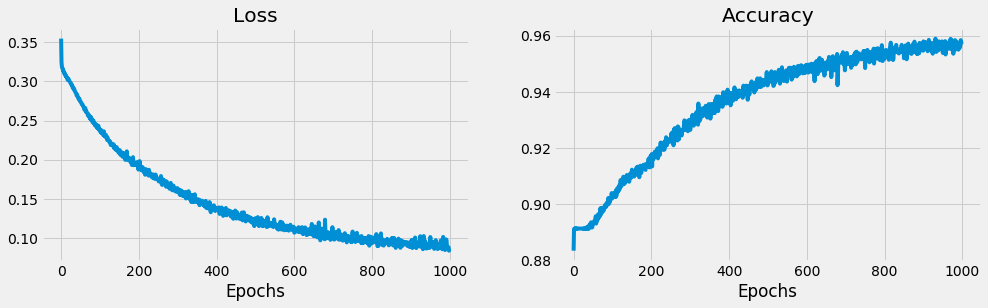

In [39]:
### PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying the Model

In [40]:
### REVIEW MODEL ACCURACY
model_loss, model_accuracy = fire_model_v1.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

117/117 - 0s - loss: 1.1512 - accuracy: 0.8468
Loss: 1.1512435674667358, Accuracy: 0.8467525243759155


In [41]:
### RUN TEST DATA THROUGH MODEL
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test_scaled

print(f"Model output: {fire_model_v1.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_model_v1.predict(new_data))}")

Model output: [[9.99726355e-01 2.73615471e-04]
 [1.00000000e+00 7.25068118e-13]
 [1.28739879e-01 8.71260166e-01]
 ...
 [1.00000000e+00 1.15037695e-10]
 [1.00000000e+00 3.07113168e-10]
 [1.00000000e+00 3.47816531e-09]]
Predicted class: 2


In [42]:
### REVIEW PREDICTIONS AND THEIR PROBABILITIES
# X Inputs
predictions = np.argmax(fire_model_v1.predict(X_test_scaled), axis=1)
probs = fire_model_v1.predict(X_test_scaled)

# Change the shape of y
old_y_test = y_test
new_y_test = np.array(old_y_test)
y_test = new_y_test.reshape(-1, 1) 
y_test_array = y_test.ravel()
y_test_array


#Create a df to view predicted vs actual
pred_df = pd.DataFrame({
    "Predictions": predictions,
    "Actual": y_test_array, 
    "P(0) model": np.round(probs[:, 0], 5),
    "P(100) model": np.round(probs[:, 1], 5),
    })

pred_df.head(60)

,Predictions,Actual,P(0) model,P(100) model
0,0,1,0.99973,0.00027
1,0,0,1.00000,0.00000
2,1,0,0.12874,0.87126
3,0,0,0.57252,0.42748
4,0,0,0.99546,0.00454
5,0,0,0.99266,0.00734
6,0,0,1.00000,0.00000
7,0,0,1.00000,0.00000
8,0,0,0.99998,0.00002
9,1,0,0.00638,0.99362


### SAVE MODEL

In [43]:
### SAVING MODEL
final_model_path = os.path.join("..", "static", "model", "fires_class_model_v1.h5")
temp_model_path = os.path.join("nnModel_fire_size_model_v1.h5")

fire_model_v1.save(temp_model_path)

### RELOAD AND RUN TEST RUN ON NEW MODEL

In [44]:
### LOAD MODEL
import keras.models

new_model_path = os.path.join("..", "static", "model", "fires_class_model_v1.h5")
temp_model_path = os.path.join("nnModel_fire_size_model_v1.h5")
New_model = keras.models.load_model(temp_model_path)

OSError: SavedModel file does not exist at: fires_class_model_v1.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
### TEST/RUN NEW MODEL
model_loss, model_accuracy = New_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
### TEST MODEL WITH NEW DATA
# --------------------------------------------------------------- #

# IMPORT CSV FOR DF
X_input_dfFormat = os.path.join("..", "Data", "X_input_dfFormat.csv")


# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
X_input_dfFormat_df = pd.read_csv(X_input_dfFormat)

# X_input_dfFormat_df['NAME_Lincoln']

# PREP X VALUES FOR MODEL
# --------------------------------------------------------------- #
# # Reshape X from df to array v1
newInput = X_input_dfFormat_df.values.reshape(-1, 58)

# # # View output
# print(f"Shape of X Input is {X.shape}")
# print(f"Type of X input is {type(X)}")

# RUN TEST
# --------------------------------------------------------------- #
# print(f"Model output: {np.argmax(fire_model_v1.predict(newInput), axis=1)}")
# np.argmax(New_model.predict(new_data))
# print(f"Model output: {New_model.predict(newInput)}")
# print(f"Predicted class: {np.argmax(New_model.predict(newInput))}")

# CREATE TO VIEW PREDICTIONS
# --------------------------------------------------------------- #
predictions_newInput = np.argmax(New_model.predict(newInput), axis=1)
probs = New_model.predict(newInput)

pred_df = pd.DataFrame({
    "Predictions": predictions_newInput,
    "P(0) model": np.round(probs[:, 0], 5),
    "P(100) model": np.round(probs[:, 1], 5),
    })

pred_df
# print(X_input_dfFormat_df['D1'])